In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
path = "CarPrice_Assignment.csv"
# Available at: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [3]:
df = pd.read_csv(path)

# Take a look at the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Summarize the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cdf = df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']]
cdf.head(9)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,15250.0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,17710.0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,18920.0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,23875.0


# Working with numerical-valued features

At first, we'll only be working with the already numerical-valued features.
We'll later try our hand at categorical features, where some encoding strategies will be needed to convert these features to numerical values without distorting their meaning, like "one-hot encoding".

### Visualizing feature and target distribution

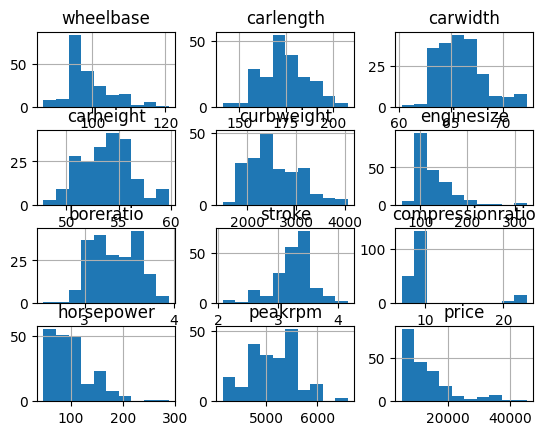

In [6]:
viz = cdf[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']]
viz.hist()
plt.show()

### Visualizing how linear each feature is in relation to price

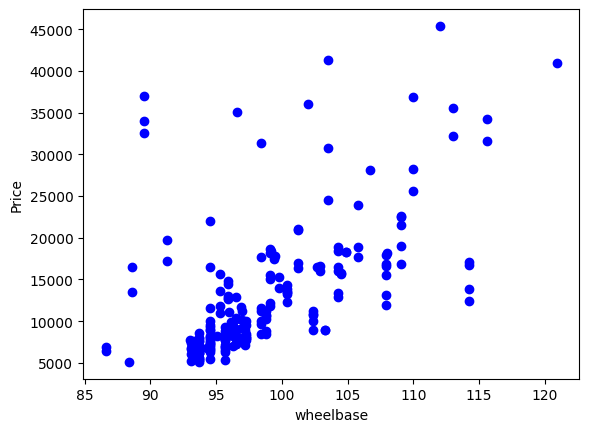

In [7]:
plt.scatter(cdf.wheelbase, cdf.price,  color='blue')
plt.xlabel("wheelbase")
plt.ylabel("Price")
plt.show()

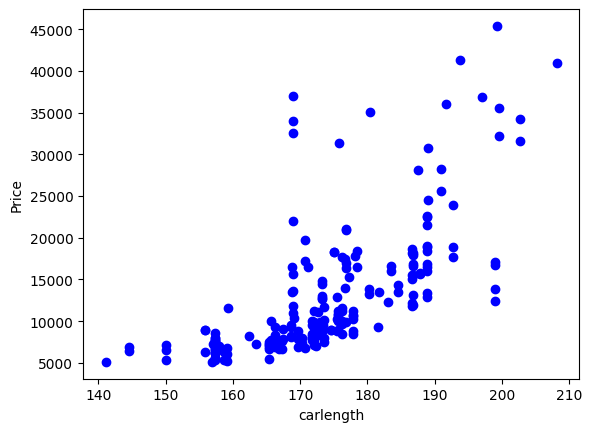

In [8]:
plt.scatter(cdf.carlength, cdf.price,  color='blue')
plt.xlabel("carlength")
plt.ylabel("Price")
plt.show()

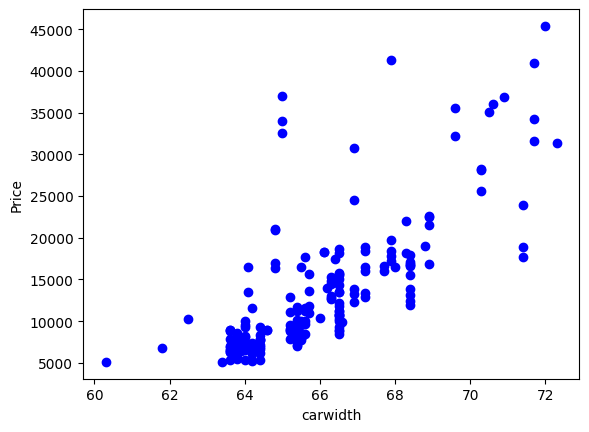

In [9]:
plt.scatter(cdf.carwidth, cdf.price,  color='blue')
plt.xlabel("carwidth")
plt.ylabel("Price")
plt.show()

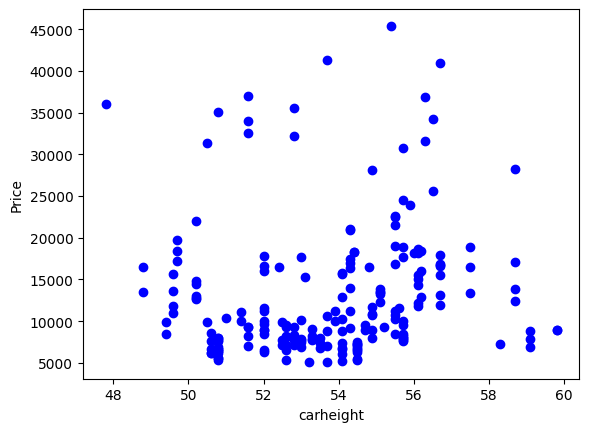

In [10]:
plt.scatter(cdf.carheight, cdf.price,  color='blue')
plt.xlabel("carheight")
plt.ylabel("Price")
plt.show()

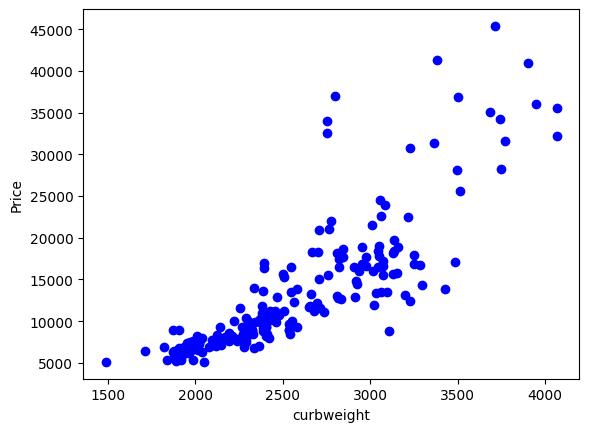

In [11]:
plt.scatter(cdf.curbweight, cdf.price,  color='blue')
plt.xlabel("curbweight")
plt.ylabel("Price")
plt.show()

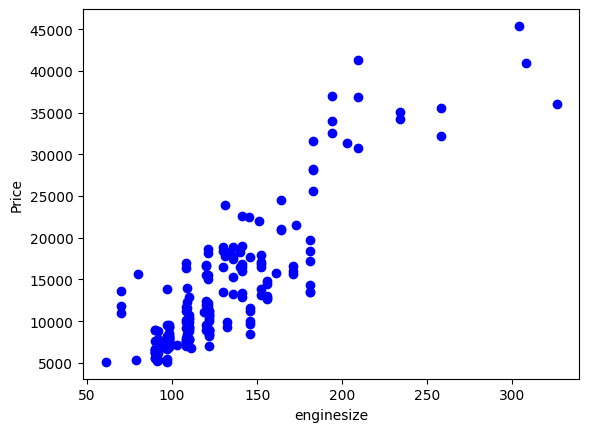

In [12]:
plt.scatter(cdf.enginesize, cdf.price,  color='blue')
plt.xlabel("enginesize")
plt.ylabel("Price")
plt.show()

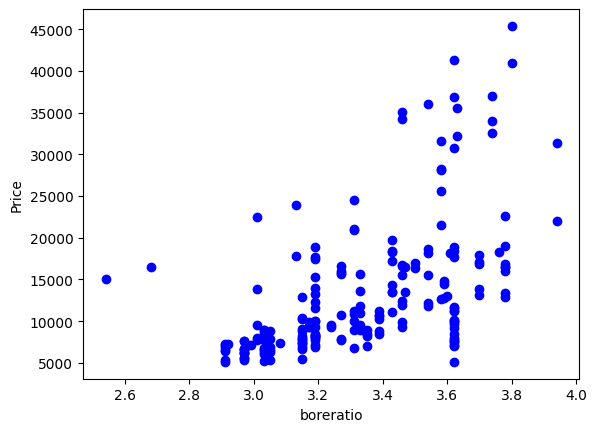

In [13]:
plt.scatter(cdf.boreratio, cdf.price,  color='blue')
plt.xlabel("boreratio")
plt.ylabel("Price")
plt.show()

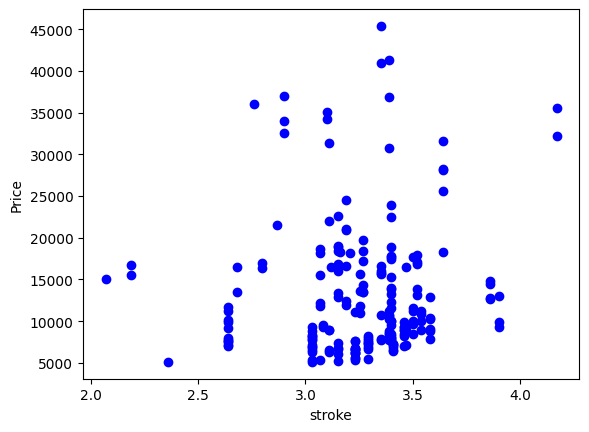

In [14]:
plt.scatter(cdf.stroke, cdf.price,  color='blue')
plt.xlabel("stroke")
plt.ylabel("Price")
plt.show()

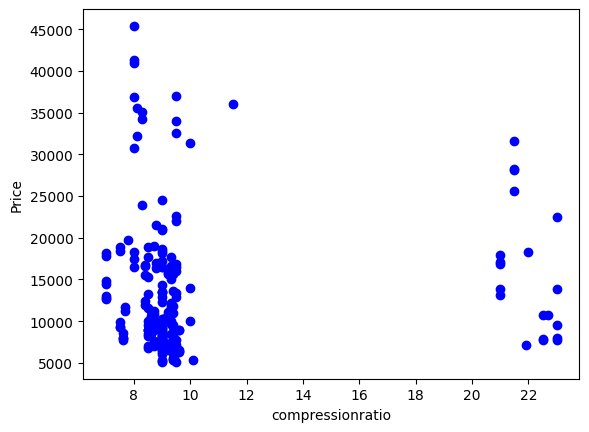

In [15]:
plt.scatter(cdf.compressionratio, cdf.price,  color='blue')
plt.xlabel("compressionratio")
plt.ylabel("Price")
plt.show()

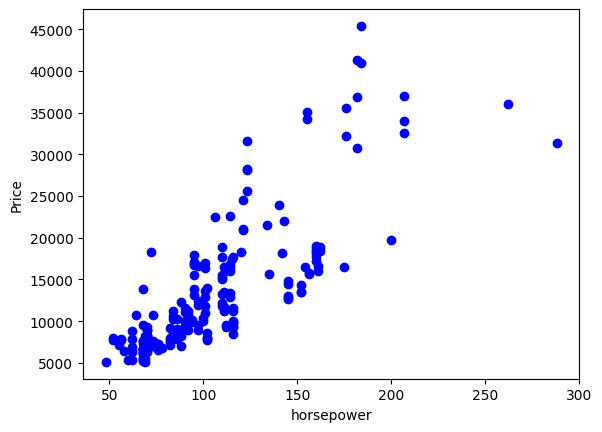

In [16]:
plt.scatter(cdf.horsepower, cdf.price,  color='blue')
plt.xlabel("horsepower")
plt.ylabel("Price")
plt.show()

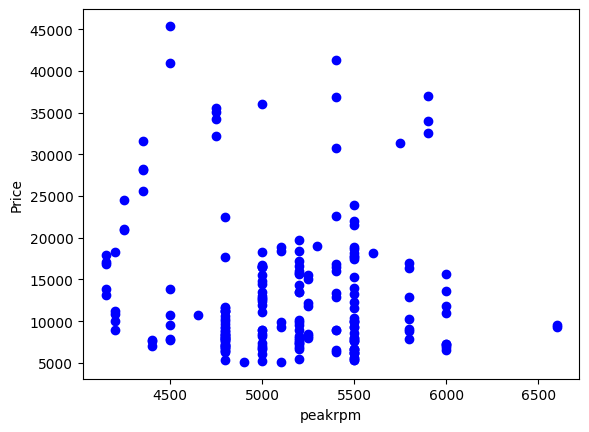

In [17]:
plt.scatter(cdf.peakrpm, cdf.price,  color='blue')
plt.xlabel("peakrpm")
plt.ylabel("Price")
plt.show()

### Intuition

From the graphs, it looks like the most relevant numerical attributes are carwidth, curbweight, enginesize, boreratio and horsepower.

The wheelbase and carlength graphs show faint signs of linearity, but not much.

In [18]:
from sklearn import linear_model

# Splitting the data between "train" and "test"
train, test = sklearn.model_selection.train_test_split(cdf, test_size=0.2)

# Collecting the dataframe feature columns
feature_columns = cdf.columns.tolist()
feature_columns.remove('price')

print(feature_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']


In [19]:
# Defining model (regr)
# Separating training parameters (train_x, train_y)
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[feature_columns])
train_y = np.asanyarray(train[['price']])

# Normalizing train attributes before training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

# Training model
regr.fit(train_x, train_y)

# Printing the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 825.60774439 -971.96514153 1185.7972671   319.46610329  966.80006377
  3840.79548305 -212.61566415 -811.67385127  616.49056354 1810.39544262
   966.5101803 ]]
Intercept:  [12507.01016463]


In [20]:
from sklearn.metrics import r2_score

# Separating testing parameters (test_x, test_y)
test_x = np.asanyarray(test[feature_columns])
test_y = np.asanyarray(test[['price']])

# Normalizing test attributes before testing/predicting
test_x = scaler.transform(test_x)

# Testing model
test_y_ = regr.predict(test_x)

# Printing some model evaluation metrics
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

len(test_y_)
len(test_y)

Mean absolute error: 2612.78
Residual sum of squares (MSE): 14593993.10
R2-score: 0.84


41

Note 1: It's worth to note though that the more features we add, the higher the model's R2-score, so even though the apparent linear relation of an attribute with response to the target value is not apparently relevant, it's inclusion can still contribute to the model.

Note 2: It is known that some data subgroups can represent the dataset underlying relations/structure better than others. And since we're working with a small dataset, this difference can get pretty staggering. For example: between 20 different (random) training samples, the model's R2-score ranged from 0.61 to 0.87, even when using the same features for training.

# Adding some categorical features

Next, we'll be adding the following categorical features: 'cylindernumber' and 'enginetype', to practice encoding techniques

In [21]:
cdf = df[['cylindernumber','enginetype','carwidth','curbweight','enginesize','boreratio','horsepower','price']]
cdf.head(9)

,cylindernumber,enginetype,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,four,dohc,64.1,2548,130,3.47,111,13495.0
1,four,dohc,64.1,2548,130,3.47,111,16500.0
2,six,ohcv,65.5,2823,152,2.68,154,16500.0
3,four,ohc,66.2,2337,109,3.19,102,13950.0
4,five,ohc,66.4,2824,136,3.19,115,17450.0
5,five,ohc,66.3,2507,136,3.19,110,15250.0
6,five,ohc,71.4,2844,136,3.19,110,17710.0
7,five,ohc,71.4,2954,136,3.19,110,18920.0
8,five,ohc,71.4,3086,131,3.13,140,23875.0


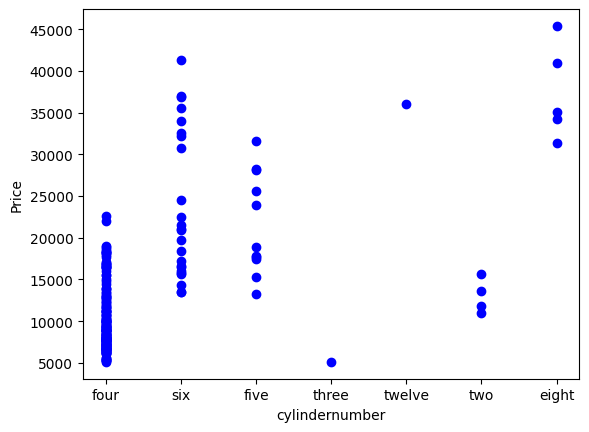

In [22]:
# Plotting 'cylindernumber' with relation to 'price'
plt.scatter(cdf.cylindernumber, cdf.price,  color='blue')
plt.xlabel("cylindernumber")
plt.ylabel("Price")
plt.show()

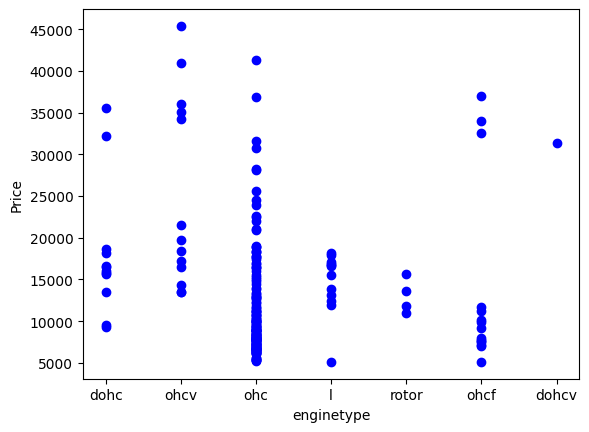

In [23]:
# Plotting 'enginetype' with relation to 'price'
plt.scatter(cdf.enginetype, cdf.price,  color='blue')
plt.xlabel("enginetype")
plt.ylabel("Price")
plt.show()

### Simple/direct encoding
(Note: made-up method name!)

First let's do 'cylindernumber'.

As you may notice, even though the values in the 'cylindernumber' column are categorical (strings), their fundamental meaning is inherently numerical (notice: in a graph, 'four' cylinders should be twice as distant from origin as 'two' cylinders).

In this case, just encoding: "four" -> 4, "five" -> 5, etc. will be enough.

In [24]:
# Using the "unique" method to visualize all the unique values in 'cylindernumber'
cdf['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
# Creating a dictionary for mapping the values
map = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}

# Using the "loc" method to substitute each "key" for the corresponding "value" in the 'cylindernumber' column
for key, value in map.items():
    cdf.loc[cdf['cylindernumber'] == key, 'cylindernumber'] = value
    
# Testing again
cdf['cylindernumber'].unique()

array([4, 6, 5, 3, 12, 2, 8], dtype=object)

### One-hot encoding

Things aren't so simple for 'enginetype', since it doesn't represent a numerical concept. Therefore, fitting each category into a numerical line (ex.: 'ohc': 0, 'ohcv': 1, 'l': 2) would be to define/force an arbitrary distance between them. Almost like saying 'l' is an enginetype twice as different/distant from 'ohc' than 'ohcv', which doesn't make sense.

To deal with this, we can use "one-hot enconding", where an n number of features is represented/encoded each as a vector in a n-dimensional space. More specifically, each feature is encoded as one of the >>basis vectors<< of such space, garanteeing that they're all equally distant from each other.

"The categorical data has no relationship among them. So after converting text to another map this should be intact. One hot encoding ensures this. Because each and every vector of the one hot encoding is orthogonal to each other. So the cosine similarity as well as distance between any two vectors are same. Thus it holds no relationship among them."
Source: https://medium.com/@arnabdas95/all-about-one-hot-encoding-7a19c5abf2b1#:~:text=Because%20each%20and%20every%20vector,any%20two%20vectors%20are%20same

In [26]:
# Applying "one-hot encoding" on column 'enginetype' on the whole dataframe
one_hot_cdf = pd.get_dummies(cdf['enginetype'])

# Adding the "one-hot columns" to the original dataframe
cdf = cdf.join(one_hot_cdf)

# Removing the old 'enginetype' column which originated the new "one-hot columns"
cdf = cdf.drop('enginetype', axis=1)

In [27]:
# Splitting the data between "train" and "test"
train, test = sklearn.model_selection.train_test_split(cdf, test_size=0.2)

# Collecting the dataframe feature columns
feature_columns = cdf.columns.tolist()
feature_columns.remove('price')

In [28]:
# Defining model (regr)
# Separating training parameters (train_x, train_y)
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[feature_columns])
train_y = np.asanyarray(train[['price']])

# Normalizing train attributes before training
# scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

# Training model
regr.fit(train_x, train_y)

# Printing the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 8.31600208e+02  1.05477805e+03  1.22737680e+03  4.13485636e+03
  -6.59302954e+02  1.65348473e+03 -3.89227788e+02  5.32907052e-14
   1.53676054e+02  1.40760796e+02  5.04513917e+02 -1.23027756e+03
   1.13503491e+03]]
Intercept:  [12688.19004268]


In [29]:
# Separating testing parameters (test_x, test_y)
test_x = np.asanyarray(test[feature_columns])
test_y = np.asanyarray(test[['price']])

# Normalizing test attributes before testing
# scaler = StandardScaler()
test_x = scaler.transform(test_x)

# Testing model
test_y_ = regr.predict(test_x)

# Printing some model evaluation metrics
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

len(test_y_)
len(test_y)

Mean absolute error: 2289.38
Residual sum of squares (MSE): 11379107.13
R2-score: 0.87


41